In [12]:
# Importar librerías
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [13]:
# Importar los datos
dataframe = pd.read_csv(r"comprar_alquilar.csv")
# Mostrar las 10 primeras filas
dataframe.head(10)
# ingresos y gastos (comunes, pago_coche,gastos_otros) son mensuales (de 1 personas o 2 si están casados)
# trabajo: 0-sin trabajo 1-autonomo 2-asalariado 3-empresario 4-Autonomos 5-Asalariados 6-Autonomo y Asalariado 7-Empresario y Autonomo 8 Empresarios o empresario y autónomo
# estado_civil: 0-soltero 1-casado 2-divorciado
# hijos: Cantidad de hijos menores (que no trabajan)
# comprar: 0-mejor alquilar 1-Comprar casa


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


In [14]:
# Agrupar datos según si es compra o alquiler
print(dataframe.groupby('comprar').size())


comprar
0    135
1     67
dtype: int64


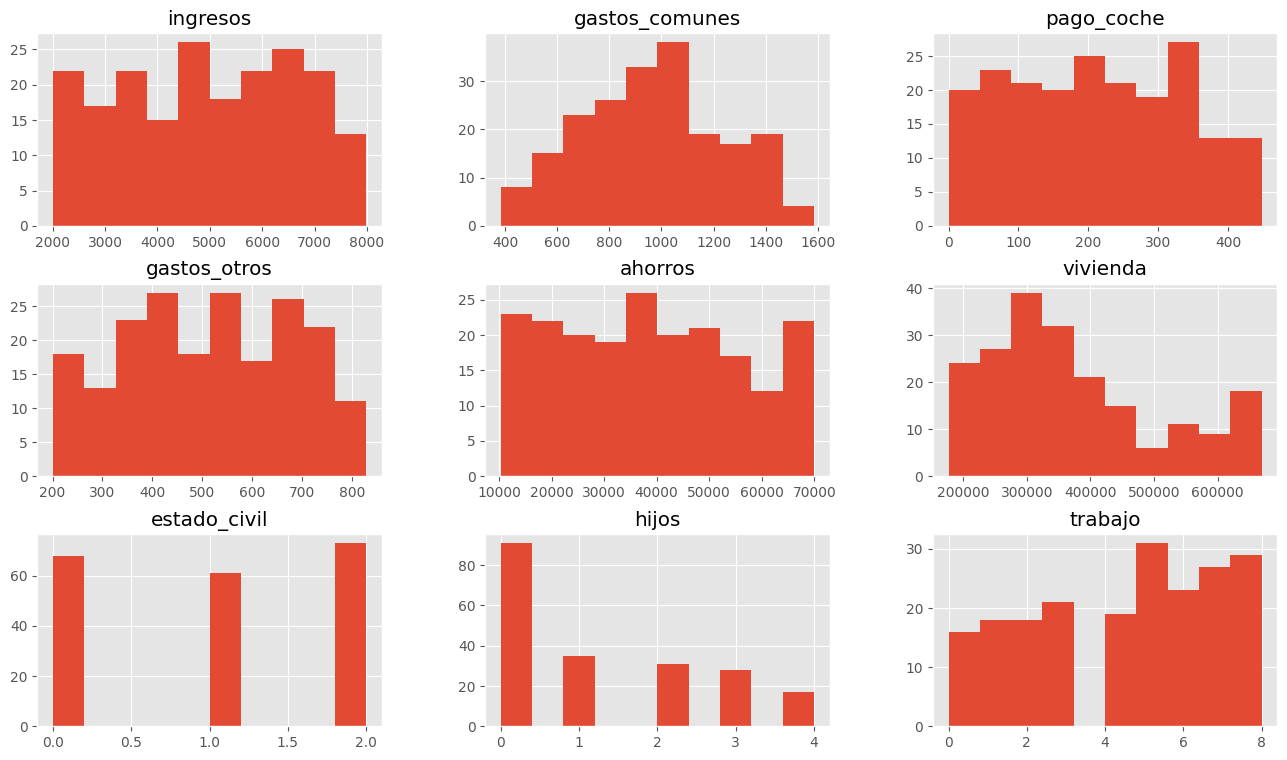

In [15]:
# Mostrar histogramas
dataframe.drop(['comprar'], axis=1).hist()
plt.show()


In [16]:
# Preprocesar los datos. Crear 2 columnas nuevas ('gastos' y 'financiar')
# En una agrupamos los gastos mensuales ('gastos')
# En la otra el presupuesto a financiar para comprar la casa ('financiar')
dataframe['gastos'] = (dataframe['gastos_comunes'] +
                       dataframe['gastos_otros']+dataframe['pago_coche'])
dataframe['financiar'] = dataframe['vivienda']-dataframe['ahorros']


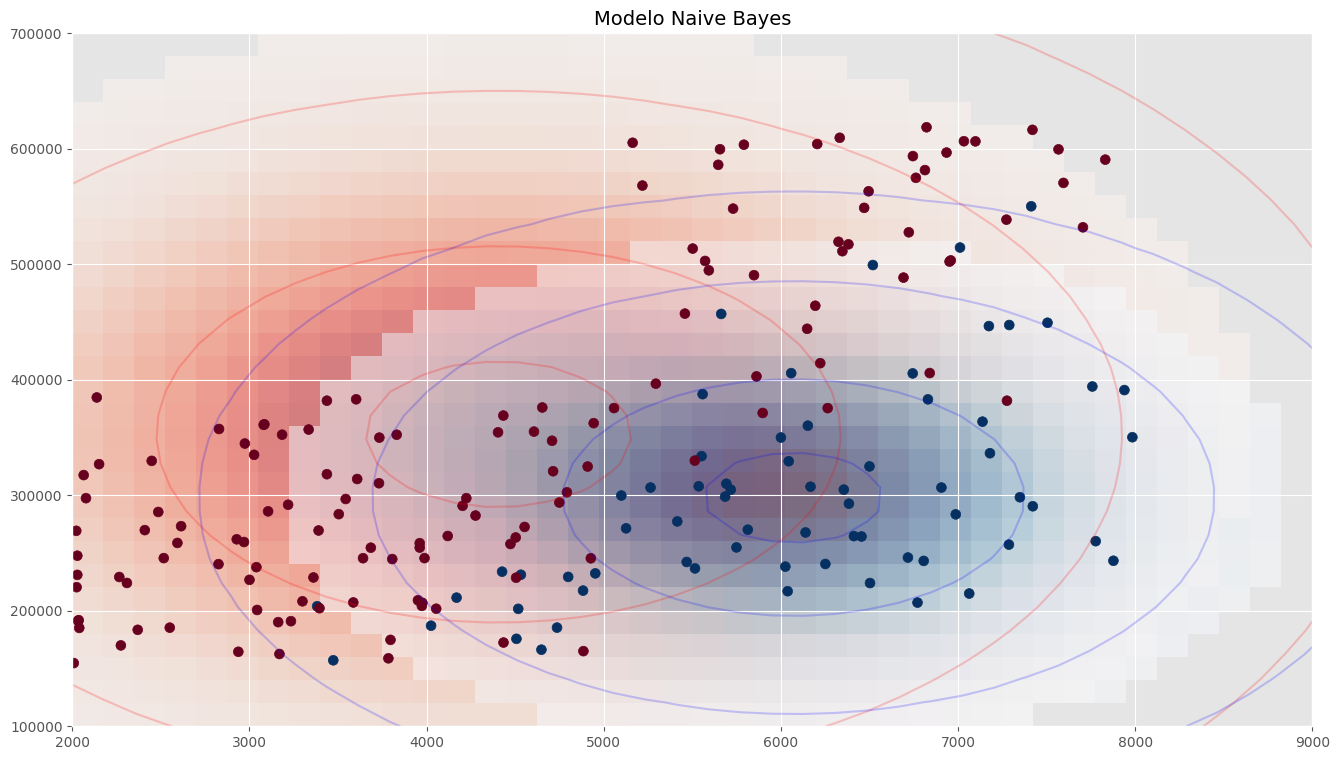

In [17]:
# Graficar los ingresos frente al importe a financiar
atributos_sel = ["ingresos", "financiar"]
X = dataframe[atributos_sel].values
y = dataframe["comprar"]

# Construir el gráfico
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Modelo Naive Bayes', size=14)

xlim = (2000, 9000)
ylim = (100000, 700000)

xg = np.linspace(xlim[0], xlim[1], 40)
yg = np.linspace(ylim[0], ylim[1], 30)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)

plt.show()


In [18]:
# Crear el modelo de Gaussian Naive Bayes
# Dividimos los datos en entrenamiento y test (20 %)
X_train, X_test = train_test_split(dataframe, test_size=0.2, random_state=6)
y_train = X_train["comprar"]  # type: ignore
y_test = X_test["comprar"]  # type: ignore


In [19]:
# Definir el clasificador
gnb = GaussianNB()


In [20]:
# Entrenar el modelo
atributos = ['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar']
gnb.fit(X_train[atributos].values, y_train) # type: ignore


GaussianNB()

In [21]:
# Predecir para los datos de test
y_pred = gnb.predict(X_test[atributos])  # type: ignore


c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [22]:
# Mostrar resultados
print('Precisión en el set de Entrenamiento: {:.2f}'
      .format(gnb.score(X_train[atributos], y_train)))  # type: ignore
print('Precisión en el set de Test: {:.2f}'.format(
    gnb.score(X_test[atributos], y_test)))  # type: ignore


Precisión en el set de Entrenamiento: 0.87
Precisión en el set de Test: 0.90


c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [23]:
# Resultados sobre los datos de test
print("Total de Muestras en Test: {}\nFallos: {}".format(
    X_test.shape[0], (y_test != y_pred).sum()))  # type: ignore


Total de Muestras en Test: 41
Fallos: 4


In [24]:
# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de Confusión")
print(confusion_matrix(y_test, y_pred))
print("Informe de clasificación")
print(classification_report(y_test, y_pred))


Matriz de Confusión
[[24  0]
 [ 4 13]]
Informe de clasificación
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.76      0.87        17

    accuracy                           0.90        41
   macro avg       0.93      0.88      0.89        41
weighted avg       0.92      0.90      0.90        41



In [25]:
# Predicción sobre nuevos valores
#                 ['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar']
print(gnb.predict([[2000,        5000,     0,       5,         200000],
                   [6000,        34000,    2,       5,         320000]]))
# Resultado esperado 0-Alquilar, 1-Comprar casa


[0 1]
